In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import dates
from plotly.offline import plot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [24]:
# df = pd.read_csv('./Datasets-master/yearly-water-usage.csv')
df = pd.read_csv('./Best_Selling_Books.csv')

In [25]:
df.head()

,Publishing_Year,Book_Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher,units_sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [7]:
df[df['Year']<0]


,Year,Water


In [19]:
df.dtypes

Publishing_Year        datetime64[ns]
Book_Name                      object
Author                         object
language_code                  object
Author_Rating                  object
Book_average_rating           float64
Book_ratings_count              int64
genre                          object
gross_sales                   float64
publisher_revenue             float64
sale_price                    float64
sales_rank                      int64
Publisher                      object
units_sold                      int64
dtype: object

In [21]:
# df['Publishing_Year'] = pd.to_datetime(df['Publishing_Year'], format='%Y') 

In [26]:
df

,Publishing_Year,Book_Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,Publisher,units_sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [36]:
# df[df['Publishing_Year'].isna()]

int(df['Year'].median())

1924

In [67]:
df.dtypes

Year     int64
Water    int64
dtype: object

In [57]:
df['Year'] = pd.to_datetime(df['Year'])

In [61]:
pd.to_datetime(df['Year'][2], format='%Y', errors='ignore')

Timestamp('1970-01-01 00:00:00')

In [63]:
# pd.to_datetime(df['Publishing_Year'])
df['Year'].apply(lambda x: pd.to_datetime(x, format='%Y',errors='ignore'))

0    1970-01-01
1    1970-01-01
2    1970-01-01
3    1970-01-01
4    1970-01-01
        ...    
74   1970-01-01
75   1970-01-01
76   1970-01-01
77   1970-01-01
78   1970-01-01
Name: Year, Length: 79, dtype: datetime64[ns]

In [39]:
df[df['Year'].isna()]

,Year,Water


In [46]:
df['Year'] = df['Year'].dt.date


In [47]:
df.groupby('Year').sum()

,Water
Year,
1970-01-01,40450


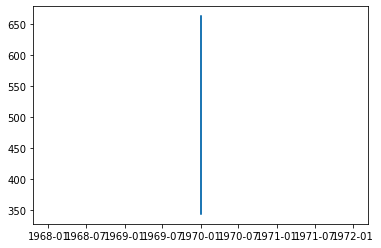

In [43]:
df
plt.plot(df['Year'].dt.date,df['Water'])

In [32]:
df['Publishing_Year'][290:300].dt.date

290    1970-01-01
291    1970-01-01
292    1970-01-01
293    1969-12-31
294    1970-01-01
295    1970-01-01
296    1970-01-01
297    1970-01-01
298    1970-01-01
299    1970-01-01
Name: Publishing_Year, dtype: object

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.head()

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5


In [7]:
date_field = 'Date'
value_field = 'Temperature'

In [8]:
def create_ts_data(df,date_col,value_col):
    ts_data = df.loc[:,[date_col,value_col]]
    ts_data = ts_data.groupby(by=date_col).sum().reset_index()
    ts_data = ts_data.sort_values(by=date_col).reset_index(drop=True)
    ts_data = ts_data.set_index(date_col)
    return ts_data

In [9]:
y = create_ts_data(df,date_field,value_field)
y

,Temperature
Date,
1981-01-01,38.1
1981-01-02,32.4
1981-01-03,34.5
1981-01-04,20.7
1981-01-05,21.5
...,...
1990-12-27,37.6
1990-12-28,23.2
1990-12-29,25.1


In [68]:
def decompose(y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',period=7)
    return decomposition

In [69]:
decomposition = decompose(y)
decomp = y.reset_index()
display(y.reset_index().head())

trend = decomposition.trend.reset_index()
display(trend.head())

seasonal = decomposition.seasonal.reset_index()
display(seasonal.head())

residual = decomposition.resid.reset_index()
display(residual.head())

,Date,Temperature
0,1981-01-01,38.1
1,1981-01-02,32.4
2,1981-01-03,34.5
3,1981-01-04,20.7
4,1981-01-05,21.5


,Date,trend
0,1981-01-01,NaN
1,1981-01-02,NaN
2,1981-01-03,NaN
3,1981-01-04,28.571429
4,1981-01-05,28.357143


,Date,seasonal
0,1981-01-01,0.032398
1,1981-01-02,-0.035706
2,1981-01-03,-0.193536
3,1981-01-04,0.070290
4,1981-01-05,0.305332


,Date,resid
0,1981-01-01,NaN
1,1981-01-02,NaN
2,1981-01-03,NaN
3,1981-01-04,-7.941718
4,1981-01-05,-7.162475


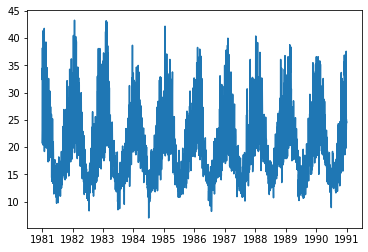

In [74]:
plt.plot(decomp['Date'],decomp['Temperature'])

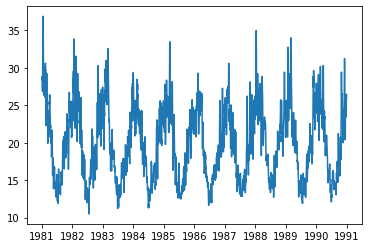

In [71]:
plt.plot(trend['Date'],trend['trend'])

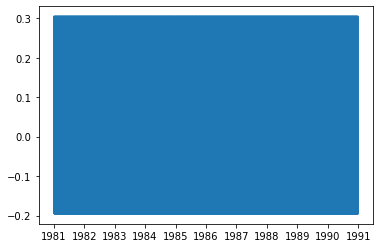

In [72]:
plt.plot(seasonal['Date'],seasonal['seasonal'])

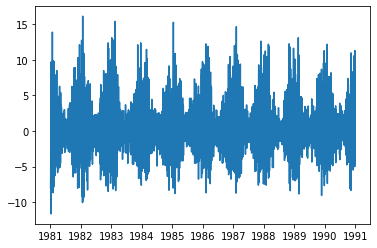

In [73]:
plt.plot(residual['Date'],residual['resid'])

# Plotly

In [75]:
decomposition_data = [go.Scatter( x=decomp[date_field],y=decomp[value_field],name='line',mode='lines')]
figure = go.Figure(data = decomposition_data)
plot_div = plot(figure)

In [18]:
trend_data = [go.Scatter( x=trend[date_field],y=trend['trend'],name='line',mode='lines')]
figure = go.Figure(data = trend_data)
plot_div = plot(figure)

In [40]:
seasonal_data = [go.Scatter( x=seasonal[date_field],y=seasonal['seasonal'],name='line',mode='lines')]
figure = go.Figure(data = seasonal_data)
plot_div = plot(figure)

In [19]:
residual_data = [go.Scatter( x=residual[date_field],y=residual['resid'],name='line',mode='lines')]
figure = go.Figure(data = residual_data)
plot_div = plot(figure)

In [92]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2,subplot_titles=("Value", "Trend", "Seasonal", "Resid"))

fig.add_trace(go.Scatter(x=decomp[date_field],y=decomp[value_field],name='Value',mode='lines'),row=1, col=1)

fig.add_trace(go.Scatter( x=trend[date_field],y=trend['trend'],name='Trend',mode='lines'),row=1, col=2)

fig.add_trace(go.Scatter( x=seasonal[date_field],y=seasonal['seasonal'],name='Seasonal',mode='lines'),row=2, col=1)

fig.add_trace(go.Scatter( x=residual[date_field],y=residual['resid'],name='Resid',mode='lines'),row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_xaxes(title_text="Date", showgrid=False, row=2, col=1)
fig.update_xaxes(title_text="Date", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text=date_field, row=1, col=1)
fig.update_yaxes(title_text="Trend", row=1, col=2)
fig.update_yaxes(title_text="Seasonal", row=2, col=1)
fig.update_yaxes(title_text="Residual", row=2, col=2)

plot_div = plot(fig)